In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

features = [
    "ID number", "Diagnosis",
    "radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
    "compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean",
    "radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",
    "concave points_se","symmetry_se","fractal_dimension_se",
    "radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst",
    "concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"
]

df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
    comment='#', sep=',', names=features
)

print(df.shape)
print(df.info())
print(df.describe())
print("Null values:", df.isnull().sum().sum())
print("Duplicates:", df.duplicated().sum())
df.head()


(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se    

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


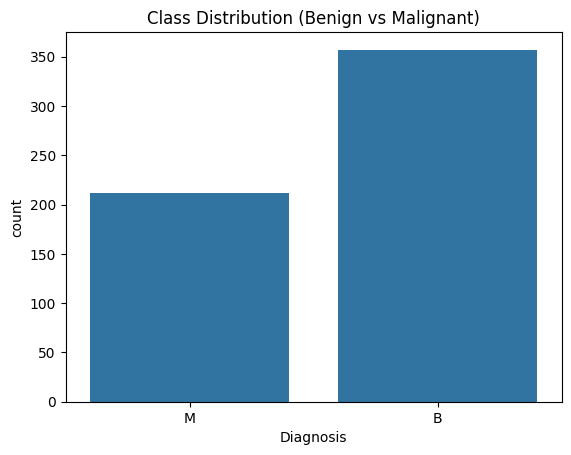

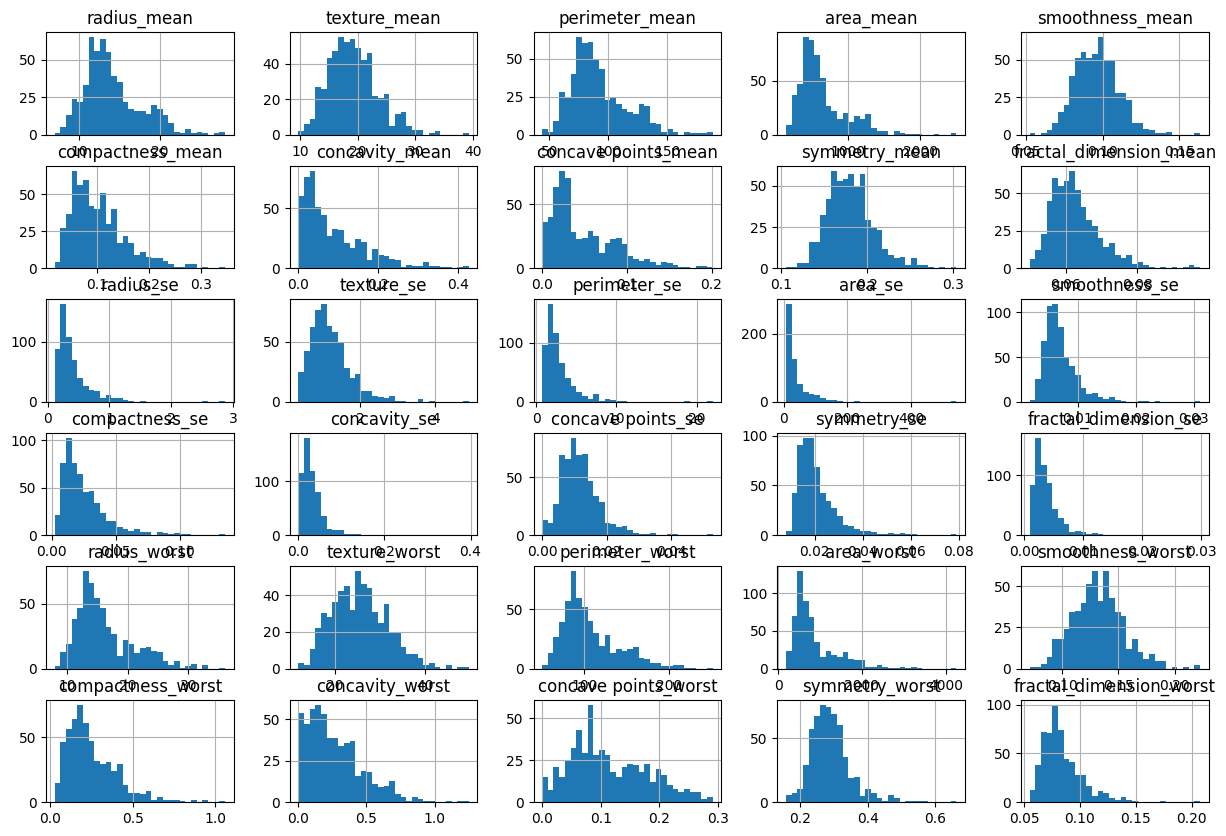

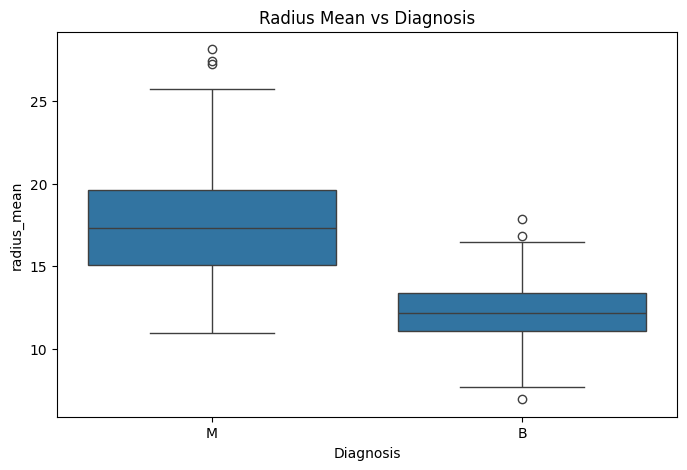

In [4]:
sns.countplot(data=df, x="Diagnosis")
plt.title("Class Distribution (Benign vs Malignant)")
plt.show()

df.drop(columns=["ID number"]).hist(figsize=(15, 10), bins=30)
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Diagnosis", y="radius_mean")
plt.title("Radius Mean vs Diagnosis")
plt.show()


In [5]:
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})
df = df.drop(columns=["ID number"])

X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))


Train class distribution:
 Diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64
Test class distribution:
 Diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64


In [7]:
model = LogisticRegression(max_iter=5000, class_weight="balanced")
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


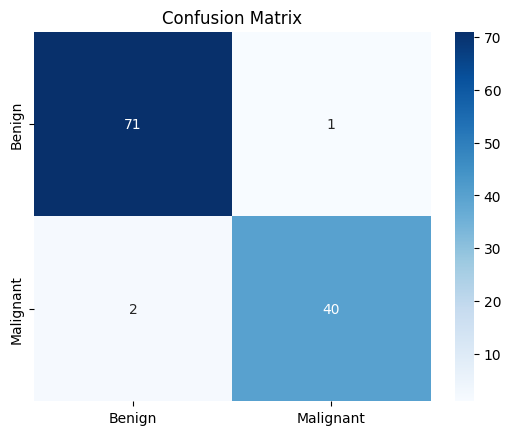

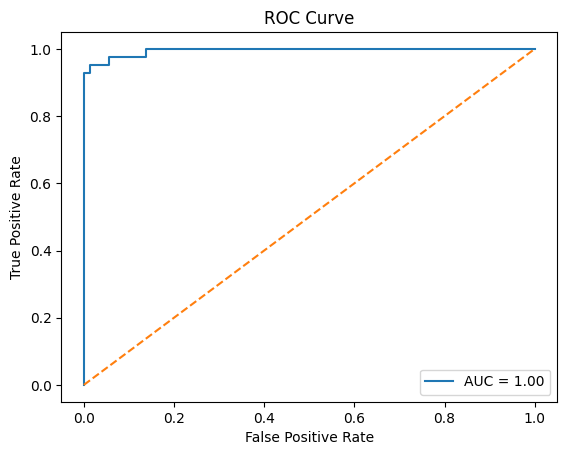

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [8]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign","Malignant"], yticklabels=["Benign","Malignant"])
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(classification_report(y_test, y_pred))


In [9]:
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

print("""
Observations:
- If train and test accuracy are close → good generalization.
- If train >> test → overfitting.
- If both low → underfitting.
- False Positives (predicting Malignant when actually Benign): cause unnecessary stress & tests.
- False Negatives (predicting Benign when actually Malignant): dangerous since cancer goes undetected.
- Focus: Minimize False Negatives → prioritize Recall (Sensitivity).
""")


Train Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158

Observations:
- If train and test accuracy are close → good generalization.
- If train >> test → overfitting.
- If both low → underfitting.
- False Positives (predicting Malignant when actually Benign): cause unnecessary stress & tests.
- False Negatives (predicting Benign when actually Malignant): dangerous since cancer goes undetected.
- Focus: Minimize False Negatives → prioritize Recall (Sensitivity).

